# Transfer Learning Tutorial : Unsupervised Instance-Based Approaches

In this tutorial, we are going to apply instance-based approaches to perform transfer learning.


In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1 : Gaussians 1D

In [2]:
def show(Xs=None, Xt=None, ys=None, yt=None, model=None, weights=None):
    """
    This is the plotting function 
    """

    if ys is None and yt is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))

        alpha = 0.1
        for x in Xs:
            ax.plot([x, x], [0, alpha], c="C0")
        ax.plot([x, x], [0, alpha], c="C0", label=r"$x_i$ observations")
        
        alpha = 0.1
        for x in Xt:
            ax.plot([x, x], [0, alpha], c="C1")
        ax.plot([x, x], [0, alpha], c="C1", label=r"$x'_i$ observations")

        ax.tick_params(left = False, right = False , labelleft = True ,
                        labelbottom = True, bottom = False, top = False)
        ax.spines.top.set_visible(False)
        ax.spines.right.set_visible(False)

        ylim_max = 0.45

        ax.plot(1, 0.0, ls="", marker=">", ms=10, color="k", clip_on=False,
                transform=ax.get_yaxis_transform())
        ax.plot(-4.3, ylim_max, ls="", marker="^", ms=10, color="k", clip_on=False)

        # ax.set_ylim(0., ylim_max)
        ax.set_xlim(-4.3, 4.3)

        ax.set_xlabel("X ~ P(X)", fontsize=16)
        ax.set_ylabel(r"$\widehat{p_s}(x)$", fontsize=16)
        
        if weights is None:
            sns.kdeplot(Xs, label=r"$\widehat{p_s}(x)$", ax=ax, shade=True)
        else:
            np.random.seed(123)
            bs_index = np.random.choice(len(Xs), 3 * len(Xs), p=weights/weights.sum())
            sns.kdeplot(Xs[bs_index], label=r"$w(x) \widehat{p_s}(x)$", ax=ax, shade=True)
        sns.kdeplot(Xt, label=r"$\widehat{p_t}(x)$", ax=ax, shade=True)

        ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1.4, 1.05))
    
    else:
        fig = plt.figure(figsize=(8, 8))

        gs = fig.add_gridspec(2, 1, height_ratios=(2, 1),
                              left=0.1, right=0.9, bottom=0.1, top=0.9,
                              wspace=0.05, hspace=0.0)
        # Create the Axes.
        ax2 = fig.add_subplot(gs[1, 0])
        ax1 = fig.add_subplot(gs[0, 0], sharex=ax2)
        
        if weights is None:
            lns1 = ax1.plot(Xs, ys, '.', ms=15, alpha=0.7, c="C0",
                            markeredgecolor="C0", label=r"$(x_i, y_i)$ observations")
        else:
            lns1 = ax1.scatter(Xs, ys, s=100*weights, alpha=0.7, c="C0",
                            edgecolor="C0", label=r"$(x_i, y_i)$ observations")
            lns1 = [lns1]
        lns8 = ax1.plot(Xt, yt, '.', ms=15, alpha=0.7, c="C1",
                        markeredgecolor="C1", label=r"$(x'_i, y'_i)$ !not available!")

        lin = np.linspace(-4.2, 4.2, 100)

        ax2.plot(lin, gaussian(lin, mu=-1), color="C0")
        lns2 = ax2.fill_between(lin, gaussian(lin, mu=-1),
                                alpha=0.2, color="C0", label=r"$p_s(x)$")
        ax2.plot(lin, gaussian(lin, mu=1.), color="C1")
        lns6 = ax2.fill_between(lin, gaussian(lin, mu=1.),
                                alpha=0.2, color="C1", label=r"$p_t(x)$")

        alpha = 0.1
        for x in Xs:
            ax2.plot([x, x], [0, alpha], c="C0")
        lns3 = ax2.plot([x, x], [0, alpha], c="C0", label=r"$x_i$ observations")

        alpha = 0.1
        for x in Xt:
            ax2.plot([x, x], [0, alpha], c="C1")
        lns7 = ax2.plot([x, x], [0, alpha], c="C1", label=r"$x'_i$ observations")

        ax2.tick_params(left = False, right = False , labelleft = False ,
                        labelbottom = True, bottom = False, top = False)
        ax2.spines.top.set_visible(False)
        ax2.spines.right.set_visible(False)

        ax1.tick_params(left = True, right = False , labelleft = True ,
                        labelbottom = False, bottom = False, top = False)
        ax1.spines.top.set_visible(False)
        ax1.spines.right.set_visible(False)
        ax1.spines.bottom.set_visible(False)

        ylim_max_ax2 = 0.45
        ylim_min_ax2 = 0.
        ylim_max_ax1 = ax1.get_ylim()[1]
        ylim_min_ax1 = ax1.get_ylim()[0]

        if model is not None:   
            if hasattr(model, "predict"):
                yp = model.predict(lin.reshape(-1, 1))
            else:
                yp = model(lin.reshape(-1, 1))
            lns4 = ax1.plot(lin, yp, c="k", label=r"$\widehat{h^*}$  predictive model")

        ax2.plot(1, 0.0, ls="", marker=">", ms=10, color="k", clip_on=False,
                transform=ax2.get_yaxis_transform())
        ax1.plot(-4.3, ylim_max_ax1, ls="", marker="^", ms=10, color="k", clip_on=False)

        ax2.set_ylim(ylim_min_ax2, ylim_max_ax2)
        ax1.set_ylim(ylim_min_ax1, ylim_max_ax1)
        ax2.set_xlim(-4.3, 4.3)
        ax2.set_xlim(-4.3, 4.3)

        ax2.set_xlabel("X ~ P(X)", fontsize=16)
        ax1.set_ylabel("Y ~ P(Y|X)", fontsize=16)

        lns = lns1 + [lns2] + lns3 + lns8 + [lns6] + lns7
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, fontsize=16, loc="upper right", bbox_to_anchor=(1.4, 1.05))

    plt.show()

## 1. Weighted Regression

In this exercise, we consider two domains defined on $\mathbb{R}$ : the source domain $P_S(X, Y)$ and the target domain $P_T(X, Y)$ where:

$$P_S(X) = \mathcal{N}(-1, 1)$$

$$P_T(X) = \mathcal{N}(1, 1)$$

$$P_S(Y|X=x) = P_T(Y|X=x) = \mathcal{N}(|x|, 0.5)$$

We remind the definition of the gaussian density function of mean $\mu$ and standard deviation $\sigma$:

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( \frac{-(x-\mu)^2}{2 \sigma^2} \right)$$

We consider the scenario where the learner has access to a source **labeled** sample `(Xs, ys)` of size $m=30$ drawn according to $P_S(X, Y)$ and a target **unlabeled** sample `Xt` of size $n=30$ drawn according to $P_T(X)$.

**NB** : For the tutorial purpose, we sample also the associated labels `yt` which are not available at training time but will be used to evaluate the models on the target domain.

In [3]:
def label_func(x, noise=0.1):
    return np.abs(x) + noise * np.random.randn(len(x))

def gaussian(x, mu=0., s=1.):
    return 1./np.sqrt( 2. * np.pi * s**2 ) * np.exp( -(x-mu)**2 / ( 2. * s**2 ) )

np.random.seed(0)
Xs = np.random.randn(30) * 1. - 1.
Xt = np.random.randn(30) * 1. + 1.
ys = label_func(Xs, 0.5)
yt = label_func(Xt, 0.5)

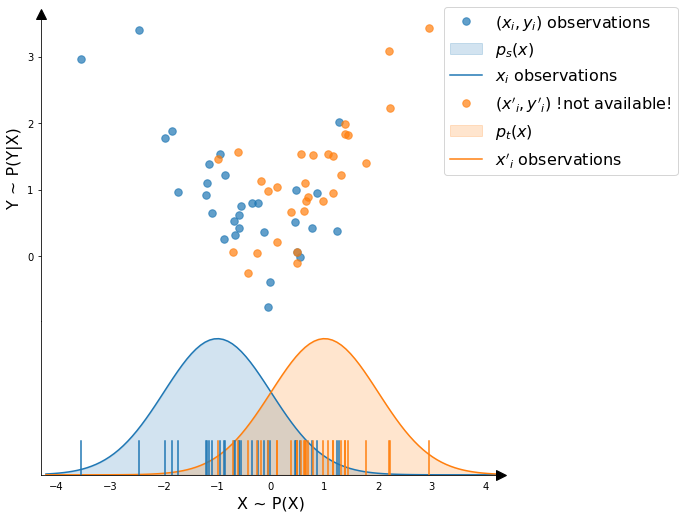

In [4]:
show(Xs, Xt, ys, yt)

### Question 1.1 :

Use `scikit-klearn` to fit a linear model on the source labeled data `(Xs, ys)` and show the model predictions on the plot

In [ ]:
from sklearn.linear_model import LinearRegression

model = #...
model.fit(#...); 
# Be carefull! You need to reshape Xs as a column vector : Xs.reshape(-1, 1)

In [ ]:
show(Xs, Xt, ys, yt, model=model)

### Question 1.2 :

Compute the source and target empirical average squared errors : 

$$\mathbb{E}_{(x, y) \sim \widehat{P_S}(X, Y)}[(h(x)-y)^2]$$

$$\mathbb{E}_{(x, y) \sim \widehat{P_T}(X, Y)}[(h(x)-y)^2]$$

What do you observe ?

In [ ]:
# ! Do not forget to reshape Xs and Xt with Xs.reshape(-1, 1) to make the prediction
err_src = #...
err_tgt = #...

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

### Question 1.3 :

Assuming that the model error $\epsilon$ is a centered gaussian ($Y = X \beta + \epsilon$ with $\epsilon \sim \mathcal{N}(0, \sigma)$), compute the pvalue of the F-test that the source and target computed errors are drawn from the same law $\epsilon$.

For a risk $\alpha = 0.01$, can we reject the hypothesis that $\epsilon_s \sim \epsilon_t$

In [ ]:
F = err_src / err_tgt
pvalue = scipy.stats.f.cdf(F, len(ys)-1, len(yt)-1)
print("pvalue = %f"%pvalue)

We now want to reweight our source risk to correct the shift between domains:

### Question 1.4 :

Show that we have:

$$\mathbb{E}_{(x, y) \sim P_T(X, Y)}[(h(x)-y)^2] = \mathbb{E}_{(x, y) \sim P_S(X, Y)}[w(x) (h(x)-y)^2]$$

With:

$$w(x) = \frac{p_s(t)}{p_s(x)}$$

### Question 1.5

Express the density ratio $w(x)$ as a function of $x$ and write a python function for it.

Then plot a comparison of the empirical source distribution with its reweighted counterpart.

In [ ]:
def density_ratio(x):
    return #...

In [ ]:
show(Xs, Xt)
show(Xs, Xt, weights=density_ratio(Xs))

### Question 1.6

Now that we have computed $w(x)$, we can give a "debiased" estimation of the target risk by reweighting the source risk.

Compute a reweighted average of the source errors and compare it to the target average error.

In [ ]:
err_src = #...
err_tgt = #...

print("Source reweighted average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

### Question 1.7

Compute the F statistic. Can we reject the hypothesis that $\epsilon_s \sim \epsilon_t$

In [ ]:
F = err_src / err_tgt
pvalue = scipy.stats.f.cdf(F, len(ys)-1, len(yt)-1)
print("pvalue = %f"%pvalue)

### Question 1.8

We know want to fit the linear regression model based on the reweighted source risk.

Compute analyticaly the linear regression solution $\beta^*$

**Hint** : Use the `X, y` arrays defined below. The "full ones" vector added to the input matrix is usefull to fit the intecept.

In [ ]:
X = np.concatenate((Xs.reshape(-1, 1), np.ones((Xs.shape[0], 1))), axis=1)
y = ys.reshape(-1, 1)

In [ ]:
Delta = np.diag(density_ratio(Xs)) 

beta = np.linalg.inv(X.transpose() @ Delta @ X) @ X.transpose() @ Delta @ y

print("Linear Regression coeficient", beta.ravel())

Define a debiased_model function which multiply the input matrix `x` with the $\beta$ coeficients

In [ ]:
def debiased_model(x):
    x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    return x.dot(beta).ravel()

### Question 1.9

Plot the model predictions and compute the new target risk. What do you observe?

In [ ]:
show(Xs, Xt, ys, yt, model=debiased_model, weights=density_ratio(Xs))

In [ ]:
err_src = #...
err_tgt = #...

print("Source reweighted average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

### Question 1.10

Perform a weighted regression by with the `sample_weight` argument from the `fit` method of the `LinearRegression` object from `scikit-learn`. Verify that you get the same results than previously

In [ ]:
model_2 = #...
model_2.fit(#...);

In [ ]:
show(Xs, Xt, ys, yt, model_2, density_ratio(Xs))

In [ ]:
err_src = #...
err_tgt = #...

print("Source reweighted average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

## 2. Instance-based Approaches

### Question 2.1 : PDE

Implement the Paramatric Density-Estimation (PDE) method and compare the computed weights with the theoretical density ratio.

**Hints** Use the `gaussian` function defined above with modified arguments `mu` and `s` to compute the estimated density functions.

In [ ]:
ps_Xs = #...
pt_Xs = #...

weights = pt_Xs / ps_Xs

In [ ]:
args = np.argsort(Xs).ravel()
plt.plot(Xs[args], density_ratio(Xs[args]), label=r"$w(x)$")
plt.plot(Xs, weights, ".", c="black", label=r'$\widehat{w}(x)$')
plt.xlabel("X"); plt.ylabel("Weight"); plt.legend(fontsize=16); plt.show()

show(Xs, Xt, weights=weights)

### Question 2.2 : KDE (1)

In many cases, the source and target input distributions are not gaussians, to estimate the densities, one can then use a kernel density approach.

Compute the Kernel Density Estimation (KDE) with gaussians kernels for the source and target densities, plot the estimated densities and compare the obtained weights to the theoretical one.

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

def kde(centers, x, sigma=0.5):
    # dist is a pairwise distance matrix of shape (len(centers), len(x))
    dist = (1./np.sqrt( 2. * np.pi * sigma**2 )) * rbf_kernel(centers, x, gamma=1/(2 * sigma))
    return dist.mean(0) # Average over the centers

def log_likelihood(p):
    return np.mean(np.log(p))

In [ ]:
sigma = 0.5  # kernel bandwidth

x = np.linspace(-4.2, 4.2, 100)
ps_x = # ... ! You need to give Xs.reshape(-1, 1) and x.reshape(-1, 1) to kde
pt_x = # ... ! You need to give Xt.reshape(-1, 1) and x.reshape(-1, 1) to kde

plt.figure(figsize=(8, 3))
plt.plot(x, ps_x); plt.plot(x, pt_x)
plt.fill_between(x, ps_x, alpha=0.2)
plt.fill_between(x, pt_x, alpha=0.2)
plt.show()

In [ ]:
weights = #...

args = np.argsort(Xs).ravel()
plt.plot(Xs[args], density_ratio(Xs[args]), label=r"$w(x)$")
plt.plot(Xs, weights, ".", c="black", label=r'$\widehat{w}(x)$')
plt.xlabel("X"); plt.ylabel("Weight"); plt.legend(fontsize=16); plt.show()
show(Xs, Xt, weights=weights)

In [ ]:
ll_src = log_likelihood(kde(Xs.reshape(-1, 1), Xs.reshape(-1, 1), sigma=sigma))

print("Source KDE Log likelihood: %.3f"%ll_src)

### Question 2.3 : KDE (2)

Try different value of kernel bandwidth `sigma`, what do you observe?

**(BONUS)** Compute the log likelihood for multiple `sigma` values, in which case the log likelihood is maximized?
Can we use the log likelihood to select a relevant value of `sigma`? What improvement can you propose to find the best `sigma` ?

### Question 2.4 NNW (1)

We now consider the instance-based method "Nearest-Neighbors-Weighting" which derives the source weights based on the pairwise distances between source and target instances.

Import the `NearestNeighborsWeighting` object from the [adapt.instance_based](https://adapt-python.github.io/adapt/contents.html#adapt-instance-based) module. 
You can access the documentation [here](https://adapt-python.github.io/adapt/generated/adapt.instance_based.NearestNeighborsWeighting.html). Then fit the weights with the `fit_weights` method and plot the results

Try different value of `n_neighbors` in the range [1, 30], what do you observe? How do you explain the resulting weights for `n_neighbors=30` ? 

In [ ]:
from adapt.instance_based import NearestNeighborsWeighting

nnw = NearestNeighborsWeighting(n_neighbors=5)
weights = nnw.fit_weights(Xs.reshape(-1, 1), Xt.reshape(-1, 1))
weights /= weights.mean()

In [ ]:
args = np.argsort(Xs).ravel()
plt.plot(Xs[args], density_ratio(Xs[args]), label=r"$w(x)$")
plt.plot(Xs, weights, ".", c="black", label=r'$\widehat{w}(x)$')
plt.xlabel("X"); plt.ylabel("Weight"); plt.legend(fontsize=16); plt.show()

show(Xs, Xt, weights=weights)

### Question 2.5 NNW (2)

Every instance-based methods implemented in `adapt` can fit directly an estimator with the learned weights.

Instantiate a `NearestNeighborsWeighting` object with a `LinearRegression` estimator and the target input data `Xt`, then use the `fit` method of the model on `Xs, ys`.

Compute the target error, what do you observe?

In [ ]:
nnw = NearestNeighborsWeighting(estimator=LinearRegression(),
                                Xt=Xt.reshape(-1, 1),
                                n_neighbors=1)

nnw.fit(Xs.reshape(-1, 1), ys);

In [ ]:
show(Xs, Xt, ys, yt, nnw, nnw.weights_/nnw.weights_.mean())

In [ ]:
err_src = #...
err_tgt = #...

print("Source reweighted average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

### Question 2.6 KMM (1)

We now consider the Kernel Mean matching method.

Import `KMM` from `adapt.instance_based` and fit the weights. What do you observe? How do you explain that the estimated density ratio $\widehat{x}$ is not continuous with respect to $x$ ?

In [ ]:
from adapt.instance_based import KMM

kmm = KMM()
weights = #... Use the fit_weights method

In [ ]:
args = np.argsort(Xs).ravel()
plt.plot(Xs[args], density_ratio(Xs[args]), label=r"$w(x)$")
plt.plot(Xs, weights, ".", c="black", label=r'$\widehat{w}(x)$')
plt.xlabel("X"); plt.ylabel("Weight"); plt.legend(fontsize=16); plt.show()

show(Xs, Xt, weights=weights)

### Question 2.7

Use the `fit` method to fit a linear model with the learned weights. Compute the target error, what do you observe?

**(BONUS)** How do you explain that KMM and NNW provide lower target risk than the weighted regression using the optimal density ratio ?

In [ ]:
kmm = KMM(estimator=LinearRegression(), Xt=Xt.reshape(-1, 1), verbose=0, random_state=0)
kmm.fit(#...)

In [ ]:
show(Xs, Xt, ys, yt, kmm, kmm.weights_)

In [ ]:
err_src = #...
err_tgt = #...

print("Source reweighted average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

# Exercise 2 : CT-Scan Dataset

We now consider a real-life transfer scenario using the [CT-Scan dataset](https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis) from the UCI machine leanring repository.

This dataset is composed of more than $50000$ Ct-Scan slices coming from around $100$ different patients. The goal is to predict the relative location of the slice in the patient based on features extracted from the slice (cf Figure below)

![ctscan](ctscan.png)

We consider the following transfer learning scenario, where the learner has access to labeled data for every patients except one:  discard the patient with the more data and consider it as a target patient. We are in the realistic situation where an expert (radiologist) has labeled the data for many patients, but the model is applied on new coming patient for which no labels is available.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00206/slice_localization_data.zip")

print(df.shape)
df.head()

In [ ]:
X = df.drop(["patientId", "reference"], axis=1)
y = df["reference"]

In [ ]:
source_ids = [i for i in range(97) if i != 46]
target_ids = [46]

X_src = X.loc[df.patientId.isin(source_ids)]
X_tgt = X.loc[df.patientId.isin(target_ids)]

y_src = y.loc[df.patientId.isin(source_ids)]
y_tgt = y.loc[df.patientId.isin(target_ids)]

In [ ]:
print("Shape of Xs", X_src.shape)
print("Shape of Xt", X_tgt.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_src, y_src, train_size=0.8)

### Question 1

The plots below show the two first components of the PCA of the 384 input features. We compare the difference between the train and test set which are uniform splits of the source dataset and the difference between the source and target dataset.

What do we observe? Can we consider this problem as a transfer learning problem?

In [ ]:
from sklearn.decomposition import PCA

X_pca = PCA(2).fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(X_pca[X_train.index, 0], X_pca[X_train.index, 1], 'o', label="Train", markeredgecolor="w", ms=5)
ax1.plot(X_pca[X_test.index, 0], X_pca[X_test.index, 1], 'o', label="Test", markeredgecolor="w", ms=5)

ax2.plot(X_pca[X_src.index, 0], X_pca[X_src.index, 1], 'o', label="Source", markeredgecolor="w", ms=5)
ax2.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(y_train, density=True, bins=30, label="Train")
ax1.hist(y_test, alpha=0.5, density=True, bins=30, label="Test")

ax2.hist(y_src, label="Source", density=True, bins=30)
ax2.hist(y_tgt, label="Target", density=True, bins=30, alpha=0.5, color="red")

ax1.legend(); ax2.legend()
ax1.set_title("Output Distribution Train-Test"); ax2.set_title("Output Distribution Source-Target")

plt.show()

### Question 2

Fir a `Ridge` regression model on the training data and compute the source risk (on the test set) and the target risk.

What can be observed?

In [ ]:
from sklearn.linear_model import Ridge

model = #...
model.fit(#...);

In [ ]:
yps = # prediction test
ypt = # prediction tgt
err_src = #...
err_tgt = #...

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

plt.figure(figsize=(6, 6))
plt.plot(y_test, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

### Question 3

Can we consider that the source risk is a good estimation of the target risk? is the covariate-shift assumption realistic in this case?

### Question 4 : KDE

We know try to apply KDE to the problem.

Try to compute an estimation of $p_s(x)$ with different source sample sizes. Compute the computational time for each size. What is the complexity of the algorithm?

In [ ]:
import time

n = 100
t0 = time.time()
X_s = X_src.sample(n)
ps_xs = kde(X_s, X_s)
t1 = time.time()
print("Time %.3f"%(t1-t0))

In [ ]:
times = []
n_samples = [100, 500, 1000, 2000, 5000, 10000]

t0 = time.time()

for n in n_samples:
    # ...compute time and append in times

In [ ]:
plt.plot(times, ".")
plt.plot(times[-1] * np.array(n_samples)**2 / n_samples[-1]**2)
plt.show()

### Question 5 : NNW (1)

What is the complexity of the NNW algorithm, is it more adapted than KDE to our problem?

Fit a reweighted Ridge regression using the weights from NNW. Plot the weights on the PCA. What do you observe?

In [ ]:
from adapt.instance_based import NearestNeighborsWeighting

nnw = NearestNeighborsWeighting(estimator=Ridge(), Xt=X_tgt, n_neighbors=5)

nnw.fit(X_train, y_train);

In [ ]:
yps = # prediction test
ypt = # prediction tgt
err_src = #...
err_tgt = #...

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

plt.figure(figsize=(6, 6))
plt.plot(y_test, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

In [ ]:
weights = nnw.weights_
weights /= weights.mean()

X_pca = PCA(2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.scatter(X_pca[X_train.index, 0], X_pca[X_train.index, 1], label="Source", edgecolor="w", s=5 * weights)
ax.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()

### Question 6 : NNW (2)

Try different vlaues of `n_neighbors`. What is the best value?

**(BONUS)** Propose some ideas to select the best value `n_neighbors`

### Question 7 : KLIEP (1)

Try the same thing with KLIEP. Use different values of the `gamma` argument, what do you observe?

In [ ]:
from adapt.instance_based import KLIEP

kliep = KLIEP(estimator=Ridge(), Xt=X_tgt, gamma=1.)

kliep.fit(X_train, y_train);

In [ ]:
yps = # prediction test
ypt = # prediction tgt
err_src = #...
err_tgt = #...

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

plt.figure(figsize=(6, 6))
plt.plot(y_test, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

In [ ]:
weights = kliep.weights_
weights /= weights.mean()

X_pca = PCA(2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.scatter(X_pca[X_train.index, 0], X_pca[X_train.index, 1], label="Source", edgecolor="w", s=5 * weights)
ax.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()

### Question 8 : KLIEP (2)

Put a list of possible values for gamma, explain what is happening?

In [ ]:
kliep = KLIEP(estimator=Ridge(), Xt=X_tgt, gamma=#...)

kliep.fit(X_train, y_train);

In [ ]:
yps = # prediction test
ypt = # prediction tgt
err_src = #...
err_tgt = #...

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

plt.figure(figsize=(6, 6))
plt.plot(y_test, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

In [ ]:
weights = kliep.weights_
weights /= weights.mean()

X_pca = PCA(2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.scatter(X_pca[X_train.index, 0], X_pca[X_train.index, 1], label="Source", edgecolor="w", s=5 * weights)
ax.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()